In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_train = Scaler.fit(df).transform(df)

In [5]:
Y_train = df['label']
df.pop('label')
X_train = df

In [6]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.2)

In [9]:
%matplotlib inline

In [10]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,Y_train)

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))

In [13]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = True)
print_score(clf, X_train, X_test, Y_train, Y_test, train = False)

Train Result : 

Accuracy Score 0.8745

Classification Report : 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94      3334
          1       0.98      0.94      0.96      3747
          2       0.90      0.89      0.89      3333
          3       0.81      0.89      0.85      3476
          4       0.81      0.95      0.88      3277
          5       0.71      0.88      0.79      3035
          6       0.98      0.89      0.93      3293
          7       0.91      0.91      0.91      3501
          8       0.95      0.57      0.71      3263
          9       0.87      0.82      0.84      3341

avg / total       0.88      0.87      0.87     33600
 

Confusion Metrics : 
 [[3288    0   12    6    8    9    5    2    2    2]
 [   1 3513   25   27   22   85    7   20   21   26]
 [  20   10 2975  124   67   32   18   45   25   17]
 [  17    1  103 3098    4  178    9   19    9   38]
 [  10    0   16   11 3117    7    3    5    9   99]
 [  85

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Fut

Average Accuracy : 0.8654

Accuracy SD : 0.0225

Test Result : 

Accuracy Score 0.8604

Classification Report : 
              precision    recall  f1-score   support

          0       0.87      0.98      0.92       798
          1       0.96      0.93      0.95       937
          2       0.89      0.90      0.89       844
          3       0.80      0.87      0.83       875
          4       0.80      0.93      0.86       795
          5       0.71      0.86      0.78       760
          6       0.97      0.87      0.91       844
          7       0.90      0.89      0.90       900
          8       0.94      0.56      0.70       800
          9       0.84      0.80      0.82       847

avg / total       0.87      0.86      0.86      8400


Confusion Metrics : 
 [[780   0   3   1   4   3   3   0   1   3]
 [  1 868   4   8   1  32   3   8   5   7]
 [  6   2 759  28  15  11   8   4   6   5]
 [  6   1  31 764   4  50   2   8   2   7]
 [  3   1   6   5 742   1   4   1   4  28]
 [ 24   1

In [14]:
from sklearn.decomposition import PCA

In [22]:
pca =PCA(n_components=60)

In [23]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

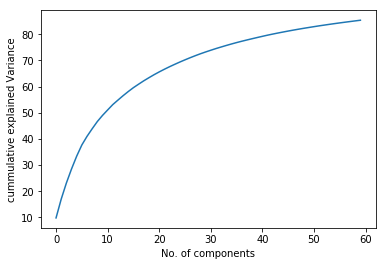

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [25]:
X_pca = pca.transform(X_train)
X_pca.shape

(33600, 60)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_pca,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
X_pca_test = pca.transform(X_test)

In [ ]:
print_score(clf, X_pca, X_pca_test, Y_train, Y_test, train = True)
print_score(clf, X_pca, X_pca_test, Y_train, Y_test, train = False)

Train Result : 

Accuracy Score 0.9062

Classification Report : 
              precision    recall  f1-score   support

          0       0.95      0.97      0.96      3334
          1       0.94      0.97      0.95      3747
          2       0.91      0.88      0.89      3333
          3       0.89      0.88      0.88      3476
          4       0.90      0.92      0.91      3277
          5       0.85      0.82      0.84      3035
          6       0.93      0.96      0.94      3293
          7       0.93      0.93      0.93      3501
          8       0.87      0.86      0.86      3263
          9       0.88      0.86      0.87      3341

avg / total       0.91      0.91      0.91     33600
 

Confusion Metrics : 
 [[3246    0    6    7    3   16   32    2   20    2]
 [   0 3643   12   12    3   24    5    4   42    2]
 [  21   43 2923   43   63   26   42   66   87   19]
 [  13   25   91 3042    3  130   29   30   75   38]
 [   8   19   25    4 3019    7   17    8   29  141]
 [  54